<a href="https://colab.research.google.com/github/DuangkamonKet/deepLearningHomework/blob/main/car_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Insurance Data
**About Dataset**
Context
The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

**Content**
The columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

**Acknowledgements**
Mostly the data is real and some part of it is also generated by me.

**Inspiration**
The data is so well balanced that it will help kagglers find a better intuition of real customers and find the deepest story lien within it.

# 1) Importing Packages & Import Data

In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file into DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/Car_Insurance_Claim.csv")
df.head()

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        sedan                    0   
1       0.0        10238         16000.0        sedan                    0   
2       0.0        10238         11000.0        sedan                    0   
3       1.0        32765         11000.0        sedan                    0   
4       0.0        32765         12000.0        sedan                    2   

   DUIS  PAST_ACCIDENTS  OUTCOME  
0     0               0      0.0  
1     0               0      1.0  
2     0               0      0.0  
3     0               0      0.0  
4     0               1      1.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [4]:
# check null value
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

There are 2 columns in car insurance dataset with missing values.

In [5]:
df.describe()

ID  CREDIT_SCORE  VEHICLE_OWNERSHIP       MARRIED  \
count   10000.000000   9018.000000       10000.000000  10000.000000   
mean   500521.906800      0.515813           0.697000      0.498200   
std    290030.768758      0.137688           0.459578      0.500022   
min       101.000000      0.053358           0.000000      0.000000   
25%    249638.500000      0.417191           0.000000      0.000000   
50%    501777.000000      0.525033           1.000000      0.000000   
75%    753974.500000      0.618312           1.000000      1.000000   
max    999976.000000      0.960819           1.000000      1.000000   

           CHILDREN   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  10000.000000  10000.000000     9043.000000         10000.000000   
mean       0.688800  19864.548400    11697.003207             1.482900   
std        0.463008  18915.613855     2818.434528             2.241966   
min        0.000000  10238.000000     2000.000000             0.000000   
25%        0.000000  10238.000000    10000.000000             0.000000   
50%        1.000000  10238.000000    12000.000000             0.000000   
75%        1.000000  32765.000000    14000.000000             2.000000   
max        1.000000  92101.000000    22000.000000            22.000000   

              DUIS  PAST_ACCIDENTS       OUTCOME  
count  10000.00000    10000.000000  10000.000000  
mean       0.23920        1.056300      0.313300  
std        0.55499        1.652454      0.463858  
min        0.00000        0.000000      0.000000  
25%        0.00000        0.000000      0.000000  
50%        0.00000        0.000000      0.000000  
75%        0.00000        2.000000      1.000000  
max        6.00000       15.000000      1.000000

In [6]:
# fill null value ["CREDIT_SCORE","ANNUAL_MILEAGE"] 
df["CREDIT_SCORE"].fillna(df["CREDIT_SCORE"].mean(), inplace = True)
df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].mean(), inplace = True)

# df.isna().sum()

In [7]:
# Rename 'OUTCOME'to LOAN'
df.rename(columns={"OUTCOME":"LOAN"}, inplace=True)

# 2) Exploration Data Analysis (EDA)

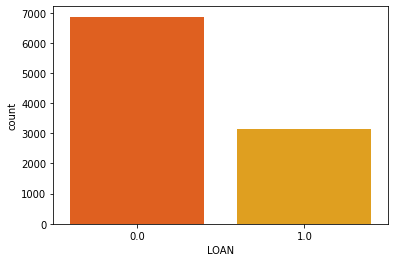

In [8]:
sns.countplot(x="LOAN", data=df, palette="autumn")
plt.show()

In [9]:
dont_claim_loan = len(df[df.LOAN == 1])
claim_loan = len(df[df.LOAN == 0])
print("Percentage of people who apply for a loan: {:.2f}%".format((dont_claim_loan / (len(df.LOAN))*100)))
print("Percentage of people who did not apply for a loan: {:.2f}%".format((claim_loan / (len(df.LOAN))*100)))

Percentage of people who apply for a loan: 31.33%
Percentage of people who did not apply for a loan: 68.67%


We have 31.33% persons who apply for a loan; And the 68.67% persons who did not apply for a loan, so our problem is somewhat imbalanced.


## 2.1) Visualize dataset

In [10]:
for x_col in df.columns:
    fig = px.histogram(df, x=x_col, color="LOAN",title="x_col")
    fig.show()

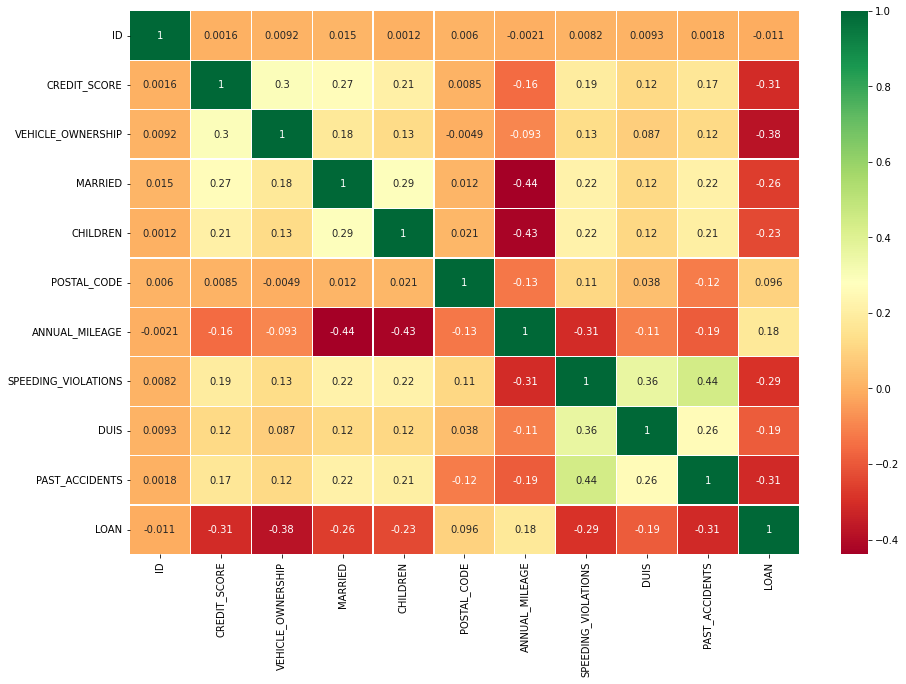

In [11]:
# correlation
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

The correlation plot shows the relation between the parameters.



Observations from correlation:

*   POSTAL_CODE, ID are the least correlated with the OUTCOME variable.
*   All other variables have a significant correlation with the OUTCOME variable.

In [12]:
# drop colums 'POSTAL_CODE','ID' 
df = df.drop(['POSTAL_CODE','ID'], axis=1)
# df.head(2)

##2.2) Check and remove outliers

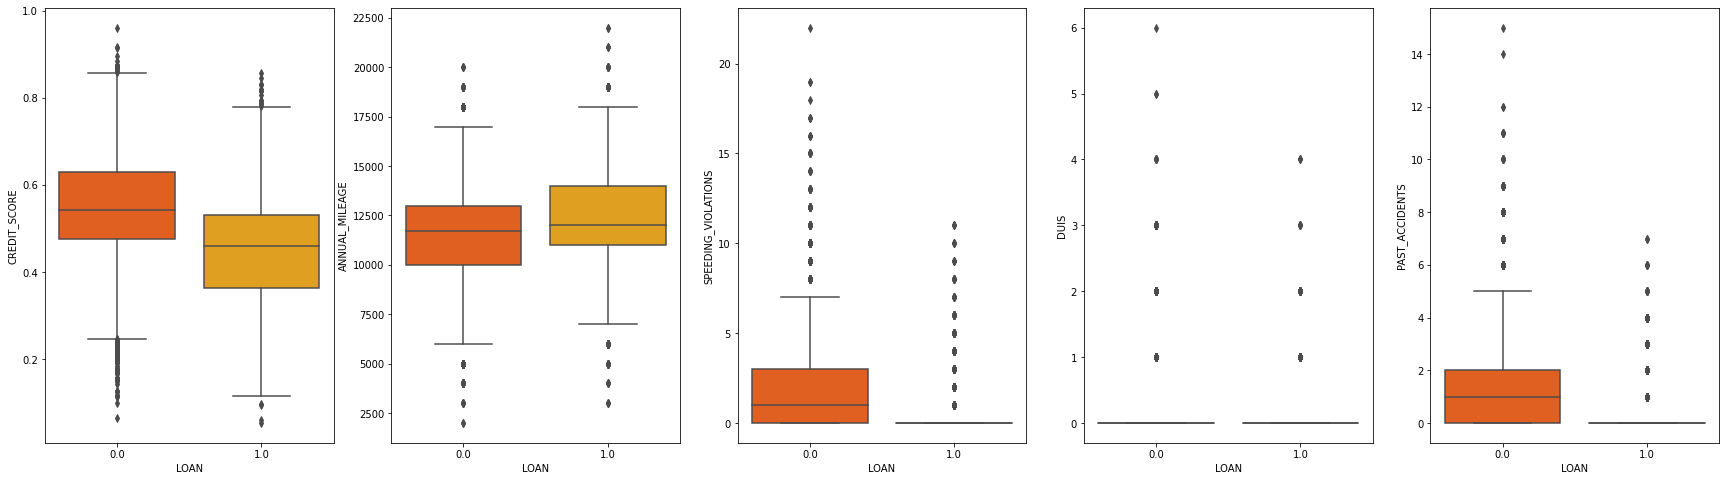

In [13]:
#check Outliers
f, axes = plt.subplots(ncols=5,nrows=1, figsize=(30,8))
sns.boxplot(x='LOAN', y='CREDIT_SCORE', data=df, palette='autumn' , ax=axes[0])
sns.boxplot(x='LOAN', y='ANNUAL_MILEAGE', data=df, palette='autumn', ax=axes[1])
sns.boxplot(x='LOAN', y='SPEEDING_VIOLATIONS', data=df, palette='autumn', ax=axes[2])
sns.boxplot(x='LOAN', y='DUIS', data=df, palette='autumn', ax=axes[3])
sns.boxplot(x='LOAN', y='PAST_ACCIDENTS', data=df, palette='autumn', ax=axes[4])
plt.show()

In [14]:
# Remove outlier
# Remove outliers in "ANNUAL_MILEAGE"
df=df[~(df["ANNUAL_MILEAGE"]>=18000)]
df=df[~(df["ANNUAL_MILEAGE"]<=5000)]

# Remove outliers in "SPEEDING_VIOLATIONS" , "DUIS" and "PAST_ACCIDENTS"
df=df[~(df["SPEEDING_VIOLATIONS"]>=15)]
df=df[~(df["DUIS"]>=5)]
df=df[~(df["PAST_ACCIDENTS"]>=10)]

# 3) Preprocessing

## 3.1) Encoding data

In [15]:
# encoding
print('GENDER : ', df.GENDER.unique())
print('AGE :', df.AGE.unique())
print('RACE : ', df.RACE.unique())
print('DRIVING_EXPERIENCE :', df.DRIVING_EXPERIENCE.unique())
print('EDUCATION : ', df.EDUCATION.unique())
print('INCOME :', df.INCOME.unique())
print('VEHICLE_YEAR :', df.VEHICLE_YEAR.unique())
print('VEHICLE_TYPE :', df.VEHICLE_TYPE.unique())


GENDER :  ['female' 'male']
AGE : ['65+' '16-25' '26-39' '40-64']
RACE :  ['majority' 'minority']
DRIVING_EXPERIENCE : ['0-9y' '10-19y' '20-29y' '30y+']
EDUCATION :  ['high school' 'none' 'university']
INCOME : ['upper class' 'poverty' 'working class' 'middle class']
VEHICLE_YEAR : ['after 2015' 'before 2015']
VEHICLE_TYPE : ['sedan' 'sports car']


In [16]:
cath_feature = pd.DataFrame(df,columns = ['GENDER','AGE','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE'])
one_hot_data = pd.get_dummies(cath_feature)

drop_list = ['GENDER','AGE','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE']
df.drop(drop_list,axis=1,inplace=True)

df_new = pd.concat([df,one_hot_data],axis=1)
df_new.dtypes

CREDIT_SCORE                 float64
VEHICLE_OWNERSHIP            float64
MARRIED                      float64
CHILDREN                     float64
ANNUAL_MILEAGE               float64
SPEEDING_VIOLATIONS            int64
DUIS                           int64
PAST_ACCIDENTS                 int64
LOAN                         float64
GENDER_female                  uint8
GENDER_male                    uint8
AGE_16-25                      uint8
AGE_26-39                      uint8
AGE_40-64                      uint8
AGE_65+                        uint8
RACE_majority                  uint8
RACE_minority                  uint8
DRIVING_EXPERIENCE_0-9y        uint8
DRIVING_EXPERIENCE_10-19y      uint8
DRIVING_EXPERIENCE_20-29y      uint8
DRIVING_EXPERIENCE_30y+        uint8
EDUCATION_high school          uint8
EDUCATION_none                 uint8
EDUCATION_university           uint8
INCOME_middle class            uint8
INCOME_poverty                 uint8
INCOME_upper class             uint8
I

## 3.2) Handling Imbalance data

### Over- sampling

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.



In [17]:
pos = df_new[df_new['LOAN']==1]
neg = df_new[df_new['LOAN']==0]
print(pos.shape)
print(neg.shape)

(3007, 32)
(6682, 32)


In [18]:
# Over-sampling
pos_rand = pos.sample(neg.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
pos_rand.shape

(6682, 32)

In [19]:
# New dataset 
# df_new = pd.concat([neg_rand,pos],axis =0)
df_over = pd.concat([pos_rand,neg],axis =0)
df_over['LOAN'].value_counts()

1.0    6682
0.0    6682
Name: LOAN, dtype: int64

## 3.3) Spliting data 
### Splitting of the Data into separate training 70% , test 20% and validate set 10%

In [20]:
X = df_over.drop(['LOAN'], axis=1)
y = df_over['LOAN']

# #Split Train Test Data  train test valiation 70%-20%-10%
x_train, x_test, y_train, y_test = train_test_split(df_over, df_over[['LOAN']],train_size=0.8,stratify=df_over[['LOAN']],random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train[['LOAN']],train_size=0.875,stratify=y_train[['LOAN']],random_state=1)


In [21]:
#Explore Train , Test and Validate 

for x_col in x_train.columns:   
    fig = px.histogram(x_train, x=x_col, color="LOAN",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="LOAN",title="Test")
    fig.show()
    fig = px.histogram(x_valid, x=x_col, color="LOAN",title="Validate")
    fig.show()

x_train=x_train.drop('LOAN',axis=1)
x_test=x_test.drop('LOAN',axis=1)
x_valid=x_valid.drop('LOAN',axis=1)

## 3.4) Normalize data

In [22]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 

x_train = scaler.transform(x_train) 
x_test  = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# 4) Machine learning
#### Model selection on scikit-learn

In [23]:
#set Seed for each repetitive - 3 times
seednumber=[911,444,888]

In [24]:
#ML Model
import time
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition','type'])

for i in range(3):
  print("******************************************************************")
  print("********   Repetitive" +str(i) + "  Set Seed = " + str(seednumber[i]))
  models = []
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('QDA', QuadraticDiscriminantAnalysis()))
  models.append(('AdaBoost', AdaBoostClassifier(random_state=seednumber[i])))
  models.append(('Bagging', BaggingClassifier(random_state=seednumber[i])))
  models.append(('Extra Trees Ensemble', ExtraTreesClassifier(random_state=seednumber[i])))
  models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=seednumber[i])))
  models.append(('Random Forest', RandomForestClassifier(random_state=seednumber[i])))
  models.append(('Ridge', RidgeClassifier(random_state=seednumber[i])))
  models.append(('SGD', SGDClassifier(random_state=seednumber[i])))
  models.append(('BNB', BernoulliNB()))
  models.append(('GNB', GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('MLP', MLPClassifier(random_state=seednumber[i])))
  models.append(('LSVC', LinearSVC(random_state=seednumber[i])))
  models.append(('DTC', DecisionTreeClassifier(random_state=seednumber[i])))
  models.append(('ETC', ExtraTreeClassifier(random_state=seednumber[i])))
  models.append(('XGB', XGBClassifier(objective='binary:logistic',eval_metric=['logloss'],random_state=seednumber[i])))
  models.append(('XGBRF', XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss'],random_state=seednumber[i])))

  DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 

      trainscore=accuracy_score(y_train,model.predict(x_train))
      
      #score =  roc_auc_score(y_train, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': trainscore,'repetition' : i,'type' :'ML'}
      resultlist=resultlist.append(result, ignore_index = True)
      """
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      """
      print("-------------------------------")
      print(  name+ " Accuracy =" + str(trainscore))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if trainscore > best_valid:
          best_valid = trainscore
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

******************************************************************
********   Repetitive0  Set Seed = 911
-------------------------------
LDA Accuracy =0.8221081890100492
LDA--- 0.056581974029541016 seconds ---
-------------------------------
QDA Accuracy =0.7153089587342314
QDA--- 0.015267610549926758 seconds ---
-------------------------------
AdaBoost Accuracy =0.8185802865084456
AdaBoost--- 0.43955564498901367 seconds ---
-------------------------------
Bagging Accuracy =0.9923027581783195
Bagging--- 0.24962377548217773 seconds ---
-------------------------------
Extra Trees Ensemble Accuracy =0.9993585631815266
Extra Trees Ensemble--- 0.7710626125335693 seconds ---
-------------------------------
Gradient Boosting Accuracy =0.8381441094718837
Gradient Boosting--- 1.1329312324523926 seconds ---
-------------------------------
Random Forest Accuracy =0.9993585631815266
Random Forest--- 0.769801139831543 seconds ---
-------------------------------
Ridge Accuracy =0.8223220012828736
R

Confusion matrix from the best model

In [25]:
# confusion matrix from the best model
EXTree = ExtraTreesClassifier(n_estimators=1000)
EXTree.fit(x_train,y_train)
test_mse = EXTree.predict(x_test)

forest_pred = EXTree.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT\n\n', classification_report(y_test, forest_pred))


 [[1169  167]
 [  92 1245]]
CLASSIFICATION REPORT

               precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      1336
         1.0       0.88      0.93      0.91      1337

    accuracy                           0.90      2673
   macro avg       0.90      0.90      0.90      2673
weighted avg       0.90      0.90      0.90      2673



### 4.1) Compare Model - Before tuning

In [26]:
# Compare Machine Learning

accResult=resultlist[["model","Acc"]].groupby("model").mean().reset_index()
print(resultlist[["model","Acc"]].groupby("model").agg(['mean','std','count']))
print("********************")
print("The best model is " + accResult[accResult['Acc']==max(accResult['Acc'])]['model'])
#fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
#fig.show()


#fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
#fig.show()

#fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
#fig.show()

#print(np.argmax(y_pred))

                           Acc                
                          mean       std count
model                                         
AdaBoost              0.818580  0.000000     3
BNB                   0.788005  0.000000     3
Bagging               0.992659  0.001319     3
DTC                   0.999359  0.000000     3
ETC                   0.999359  0.000000     3
Extra Trees Ensemble  0.999359  0.000000     3
GNB                   0.783836  0.000000     3
Gradient Boosting     0.838144  0.000000     3
KNN                   0.873958  0.000000     3
LDA                   0.822108  0.000000     3
LSVC                  0.820433  0.000432     3
MLP                   0.899544  0.004293     3
QDA                   0.715309  0.000000     3
Random Forest         0.999359  0.000000     3
Ridge                 0.822322  0.000000     3
SGD                   0.810384  0.006242     3
XGB                   0.839106  0.000000     3
XGBRF                 0.820184  0.000000     3
*************

## 4.2) Tuning model 
### Tune ExtraTreesClassifier(Adjust n_estimators)









In [27]:
h_n_estimator=range(50,300,50)

best_score=0
best_n_estimator=0

MLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
for i in range(3):
  print("**************** Repetitive "+str(i)+" **")
  for n_e in h_n_estimator:
    start_time = time.time()
    clf = ExtraTreesClassifier(n_estimators=n_e,random_state=seednumber[i]).fit(x_train, y_train)
    end_time = time.time()
    s=accuracy_score(y_valid,clf.predict(x_valid)) #clf.score(x_test, y_test)
    MLTuneResult = {'parameter': 'n_estimators','parameter_value': n_e, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    MLTuneResultlist=MLTuneResultlist.append(MLTuneResult, ignore_index = True)
    
    print('n_estimator = '+str(n_e)+ "   Acc="+str(s))
    if s>best_score:
      best_score=s
      best_n_estimator=n_e


**************** Repetitive 0 **
n_estimator = 50   Acc=0.9050112191473448
n_estimator = 100   Acc=0.906507105459985
n_estimator = 150   Acc=0.9080029917726253
n_estimator = 200   Acc=0.9057591623036649
n_estimator = 250   Acc=0.9057591623036649
**************** Repetitive 1 **
n_estimator = 50   Acc=0.9020194465220643
n_estimator = 100   Acc=0.9057591623036649
n_estimator = 150   Acc=0.9027673896783844
n_estimator = 200   Acc=0.906507105459985
n_estimator = 250   Acc=0.9072550486163051
**************** Repetitive 2 **
n_estimator = 50   Acc=0.8975317875841436
n_estimator = 100   Acc=0.9050112191473448
n_estimator = 150   Acc=0.9050112191473448
n_estimator = 200   Acc=0.9042632759910246
n_estimator = 250   Acc=0.9042632759910246


In [28]:
print(MLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std']).reset_index())

      parameter parameter_value       Acc             runtime          
                                     mean       std      mean       std
0  n_estimators              50  0.901521  0.003765  0.389661  0.008683
1  n_estimators             100  0.905759  0.000748  0.769848  0.032605
2  n_estimators             150  0.905261  0.002627  1.159891  0.061270
3  n_estimators             200  0.905510  0.001143  1.505341  0.012812
4  n_estimators             250  0.905759  0.001496  1.902813  0.017089


## 4.3) Compare Model - After tuning

In [29]:
FinalResultList= pd.DataFrame([], columns=['model', 'train time', 'inference time','Acc','repetition','type'])
MLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

for i in range(3):
  train_start_time = time.time()
  clf = ExtraTreesClassifier(n_estimators=best_n_estimator,random_state=seednumber[i]).fit(x_train, y_train)
  train_end_time = time.time()
  inference_start_time = time.time()
  s=clf.score(x_train, y_train)
  inference_end_time = time.time()
  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_train.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_valid, y_valid)
  inference_end_time = time.time()
  result = {'data set': 'validate', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_valid.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_test, y_test)
  inference_end_time = time.time()
  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_test.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)

  
  result = {'model': 'ExtraTreesClassifier', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))

[[1167  169]
 [  89 1248]]
[[1168  168]
 [  95 1242]]
[[1171  165]
 [  91 1246]]


In [30]:
######################################################
## To fill result in Train vs Validation vs Test table
########################################################
print(MLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

   data set train time           inference time                 Acc            \
                  mean       std           mean       std      mean       std   
0      test    1.12682  0.008341       0.131361  0.000706  0.903105  0.001349   
1     train    1.12682  0.008341       0.338514  0.003257  0.999359  0.000000   
2  validate    1.12682  0.008341       0.087849  0.001288  0.905261  0.002627   

  records       
     mean  std  
0  2673.0  0.0  
1  9354.0  0.0  
2  1337.0  0.0  


# 5) Deep learning

In [31]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

# Channels - checking TensorFlow Detected ?
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [32]:
# Data format: shape
# The dense layer of MLP expects the input of shape (n_samples, n_features)
pass

# Data format: data type
# Most DL frameworks use float32 as a default data type
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)
x_validdp = x_valid.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()
y_validdp = y_valid.to_numpy()

##5.1) Create the network architecture

In [33]:
input_dim = x_train.shape[1]    
output_dim = 2

In [34]:
model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1024      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

##5.2) Compile the model
Examples of compiling the model (only run one cell provided below)

In [35]:
#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

## 5.3) Tuning batch size (32,64,128)

In [36]:
h_batch_size=[32,64,128]

DLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
best_batch_number=h_batch_size[0]
best_s=0
for i in range(1): #round
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_batch_size:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                    save_weights_only=True,
                                                                    monitor='val_acc',
                                                                    mode='max',
                                                                    save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=h_n, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_batch_number=h_n

    DLTuneResult = {'parameter': 'h_batch_size','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())
print('Best batch size = ' + str(best_batch_number))

Epoch 1/100
205/205 [==============================] - 5s 5ms/step - loss: 0.5420 - acc: 0.7602 - val_loss: 0.4306 - val_acc: 0.8183
Epoch 2/100
205/205 [==============================] - 1s 4ms/step - loss: 0.4453 - acc: 0.8034 - val_loss: 0.4066 - val_acc: 0.8219
Epoch 3/100
205/205 [==============================] - 1s 4ms/step - loss: 0.4160 - acc: 0.8192 - val_loss: 0.4036 - val_acc: 0.8247
Epoch 4/100
205/205 [==============================] - 1s 5ms/step - loss: 0.4135 - acc: 0.8176 - val_loss: 0.4021 - val_acc: 0.8247
Epoch 5/100
205/205 [==============================] - 1s 5ms/step - loss: 0.4077 - acc: 0.8243 - val_loss: 0.3964 - val_acc: 0.8279
Epoch 6/100
205/205 [==============================] - 1s 4ms/step - loss: 0.4019 - acc: 0.8268 - val_loss: 0.4007 - val_acc: 0.8283
Epoch 7/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3972 - acc: 0.8302 - val_loss: 0.3942 - val_acc: 0.8294
Epoch 8/100
205/205 [==============================] - 1s 4ms/step - 

## 5.4) Tuning Epoch (50,100,300)

In [37]:
h_Epoch=[50,100,300]
best_Epoch=h_Epoch[0]
best_s=0


for i in range(1):
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_Epoch:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                    save_weights_only=True,
                                                                    monitor='val_acc',
                                                                    mode='max',
                                                                    save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=h_n, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)
    if s>best_s:
      best_s=s
      best_Epoch=h_n


    DLTuneResult = {'parameter': 'h_epoch','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Epoch = ' + str(best_Epoch))

Epoch 1/50
52/52 [==============================] - 0s 6ms/step - loss: 0.1161 - acc: 0.9502 - val_loss: 0.8739 - val_acc: 0.8600
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1235 - acc: 0.9472 - val_loss: 0.8769 - val_acc: 0.8593
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1131 - acc: 0.9510 - val_loss: 0.8537 - val_acc: 0.8571
Epoch 4/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1170 - acc: 0.9517 - val_loss: 0.8565 - val_acc: 0.8557
Epoch 5/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1229 - acc: 0.9465 - val_loss: 0.8831 - val_acc: 0.8589
Epoch 6/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1185 - acc: 0.9504 - val_loss: 0.8617 - val_acc: 0.8561
Epoch 7/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1185 - acc: 0.9501 - val_loss: 0.8829 - val_acc: 0.8532
Epoch 8/50
52/52 [==============================] - 0s 5ms/step - loss: 0.1229 - acc: 0.94

## 5.5) Tuning optimizer Adam,Adamax,Nadam

In [38]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K
h_optimizer=['Adam','Adamax','Nadam']
best_s=0
best_optimizer=h_optimizer[0]
for h_n in h_optimizer:
  # Compile with default values for both optimizer and loss
  model.compile( optimizer=h_n, loss='sparse_categorical_crossentropy', metrics=['acc'] )
  # Compile + hyperparameter tuning
  model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                        metrics=['acc'] 
                      )


  for i in range(1):
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                    save_weights_only=True,
                                                                    monitor='val_acc',
                                                                    mode='max',
                                                                    save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=300, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_optimizer=h_n


    DLTuneResult = {'parameter': 'optimizer','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Optimizer = ' + str(best_optimizer))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1024      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

## 5.6) Inference on train, validate and test dataset

In [39]:
DLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                  save_weights_only=True,
                                                                  monitor='val_acc',
                                                                  mode='max',
                                                                  save_best_only=True)

  train_start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  train_end_time = time.time()

  inference_start_time = time.time()
  y_pred = model.predict( x_traindp)
  inference_end_time = time.time()
  s=accuracy_score(y_traindp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_traindp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_validdp)
  inference_end_time = time.time()
  s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'validation', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_validdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_testdp)
  inference_end_time = time.time()
  s=accuracy_score(y_testdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_testdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)



  
  result = {'model': 'Deeplearning', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1024      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

In [40]:
#################
## To fill in  Train vs Validation vs Test
#######################
print(DLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

     data set train time           inference time                 Acc  \
                    mean       std           mean       std      mean   
0        test  27.506106  0.416625       0.177738  0.014983  0.858087   
1       train  27.506106  0.416625       0.447364  0.024290  0.926912   
2  validation  27.506106  0.416625       0.127396  0.046989  0.860883   

            records       
        std    mean  std  
0  0.009012  2673.0  0.0  
1  0.012882  9354.0  0.0  
2  0.004671  1337.0  0.0  


total 6140
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch53_valloss0.56.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch34_valloss0.55.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch27_valloss0.56.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch23_valloss0.53.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch21_valloss0.55.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch13_valloss0.52.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch07_valloss0.53.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch04_valloss0.53.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch03_valloss0.54.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch01_valloss0.52.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch81_valloss0.51.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch75_valloss0.51.hdf5
-rw-r--r-- 1 root root 49696 Sep  6 12:25 bestmodel_epoch41_vallo

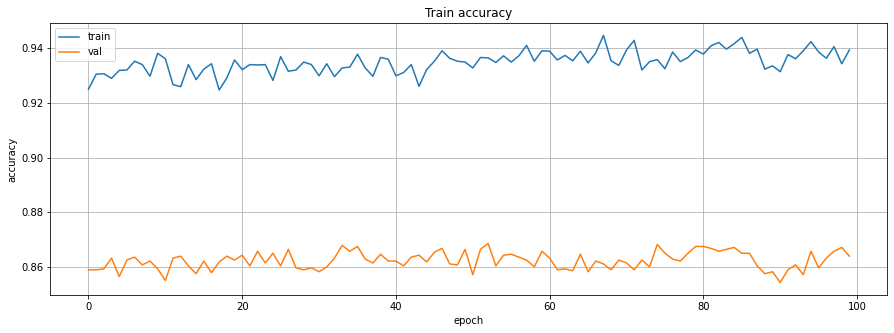

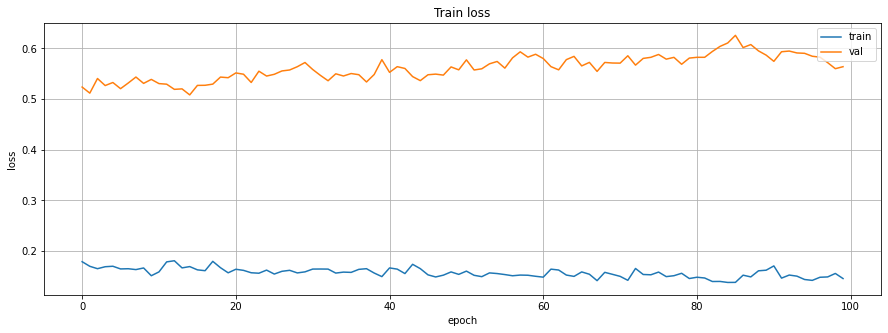

In [41]:
#######################################################################
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

history.history.keys()
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

# 6) Compare all ML and DL models

In [42]:
#Compare ML result after tune
print(FinalResultList[['model','Acc','train time', 'inference time']].groupby('model').agg(['mean','std']))

fig = px.scatter(FinalResultList, x="train time", y="Acc", color="type",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models',symbol = 'model')
fig.show()

fig = px.box(FinalResultList, x="model", y="Acc", points="all",title="Acc score for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="train time", points="all",title="Train time for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="inference time", points="all",title="Inference time for ML model",color="type")
fig.show()

                           Acc           train time           inference time  \
                          mean       std       mean       std           mean   
model                                                                          
Deeplearning          0.858087  0.009012  27.506106  0.416625       0.177738   
ExtraTreesClassifier  0.903105  0.001349   1.126820  0.008341       0.131361   

                                
                           std  
model                           
Deeplearning          0.014983  
ExtraTreesClassifier  0.000706  
